In [1]:
from modules.polyfit import Polyfit
from modules.paramtune import Paramtune
import jax.numpy as jnp
summer_fits = Polyfit('summer_data/fits.npz', input_h5='summer_data/inputdata.h5', order=3, covariance = True, num_bins = 350)

Filtered 782 of 134343 total bins for invalid input


Calculated inital guess:  [0.12885757]
Tuned Parameters:  [0.12875744] , Objective =  2927.889748128332 , chi2/ndf =  86.11440435671565
Covariance of Tuned Parameters:  [[2.18348045e-07]]
Calculated inital guess:  [0.12790236]
Tuned Parameters:  [0.12756325] , Objective =  38.48963572368604 , chi2/ndf =  1.1320481095201778
Covariance of Tuned Parameters:  [[2.51222853e-07]]
target deviation 37.3614, with confidence level 0.6827, edof 34.0000
target deviation 37.3614, with confidence level 0.6827, edof 34.0000


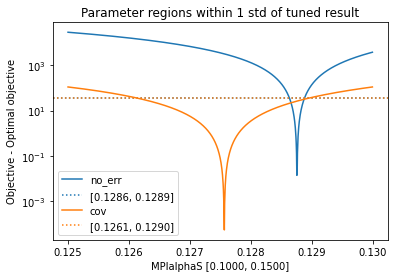

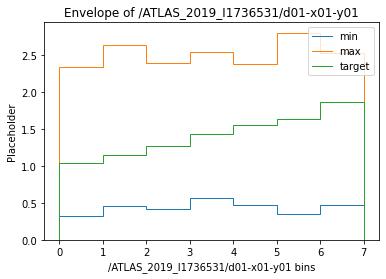

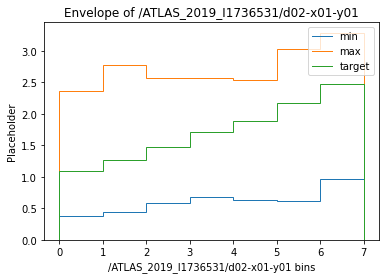

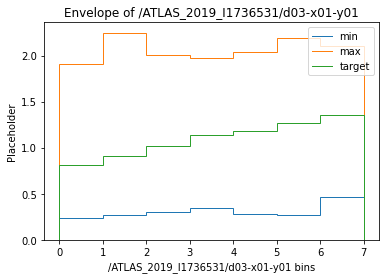

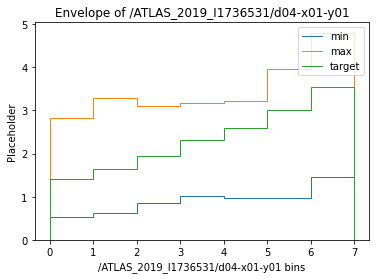

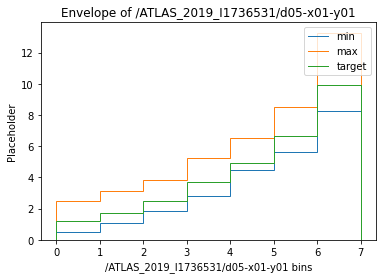

In [2]:
target_bins = jnp.array(range(40))
summer_tune_more = Paramtune('summer_data/fits.npz', 'summer_data/HEPData-ins1736531-v1-csv.h5', covariance = False, target_bins = target_bins)
summer_tune_more_cov = Paramtune('summer_data/fits.npz', 'summer_data/HEPData-ins1736531-v1-csv.h5', covariance = True, target_bins = target_bins)
graph_range = [0.125, 0.13]
summer_tune_more.graph_objective(graph_range = graph_range)
summer_tune_more_cov.graph_objective(new_figure = False, graph_range = graph_range)
summer_tune_more.graph_envelope_target()

Tuning with 100 samples of size 7 out of 10
Filtered 782 of 134343 total bins for invalid input
Sample 0 Tuned: [0.12883223] | chi2/ndf: 78.11995967231333X_isr:pdf:plus=1.0]#6    
Filtered 782 of 134343 total bins for invalid input
Sample 1 Tuned: [0.12915628] | chi2/ndf: 79.67507799303533X_isr:pdf:plus=1.0]#6    
Filtered 782 of 134343 total bins for invalid input
Sample 2 Tuned: [0.12815667] | chi2/ndf: 78.58575275475063X_isr:pdf:plus=1.0]#6    
Filtered 782 of 134343 total bins for invalid input
Sample 3 Tuned: [0.12830876] | chi2/ndf: 83.49333792507615X_isr:pdf:plus=1.0]#6    
Filtered 782 of 134343 total bins for invalid input
Sample 4 Tuned: [0.1280849] | chi2/ndf: 164.12079522288124X_isr:pdf:plus=1.0]#6    
Filtered 782 of 134343 total bins for invalid input
Sample 5 Tuned: [0.12918193] | chi2/ndf: 92.5146556131195UX_isr:pdf:plus=1.0]#6    
Filtered 782 of 134343 total bins for invalid input
Sample 6 Tuned: [0.12934482] | chi2/ndf: 109.38837007245284_isr:pdf:plus=1.0]#6    
Filt

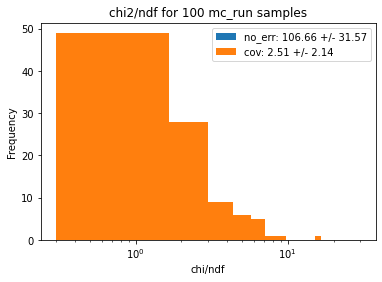

In [3]:
import matplotlib.pyplot as plt
cycle_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
summer_tune_more.graph_chi2_sample('summer_data/inputdata.h5', num_samples=100, sample_prop = 0.71,
 color = cycle_colors[0], save_file = 'summer_data/chi2results_no_err.json', num_bins = 350)
summer_tune_more_cov.graph_chi2_sample('summer_data/inputdata.h5', num_samples=100, sample_prop = 0.71,
 color = cycle_colors[1], save_file = 'summer_data/chi2results_w_cov.json', new_figure = False,
 save_figure = "summer_data/chi2_graph.pdf", num_bins = 350)


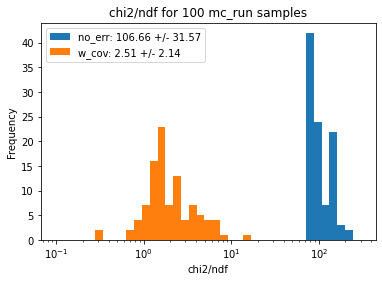

In [19]:
import json
plt.figure()
plt.title("chi2/ndf for 100 mc_run samples")
plt.ylabel("Frequency")
plt.xlabel("chi2/ndf")
plt.xscale('log')
cycle_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

graph_range = [0.1,300]
logbins = jnp.geomspace(graph_range[0], graph_range[1], 40)

for objective_name, color in zip(["no_err", "w_cov"],cycle_colors[0:2]):
    with open("summer_data/chi2results_" + objective_name + ".json", 'r') as f:
        chi2ndf = json.loads(f.read())["chi2ndf"]
    label = objective_name + ": {:.2f} +/- {:.2f}".format(jnp.mean(jnp.array(chi2ndf)), jnp.std(jnp.array(chi2ndf)))
    plt.hist(chi2ndf, bins = logbins, label = label, range = graph_range, facecolor = color)
    plt.legend()
plt.savefig("summer_data/5obs_chi2_graph.pdf")